In [1]:
import pandas as pd
df = pd.read_csv("risco_credito.csv")

In [2]:
df.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


In [3]:
X = df.iloc[:,0:4].values # seleciona todas as linhas e as colunas de 1 a 3
y = df.iloc[:,4].values   # seleciona todas as linhas e a coluna 5

In [4]:
X

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
laber_encoder = LabelEncoder()

In [7]:
X[:,0] = laber_encoder.fit_transform(X[:,0]) # todas as linhas primeira coluna
X[:,1] = laber_encoder.fit_transform(X[:,1]) # todas as linhas segunda coluna
X[:,2] = laber_encoder.fit_transform(X[:,2]) # todas as linhas terceira coluna
X[:,3] = laber_encoder.fit_transform(X[:,3]) # todas as linhas quarta coluna

In [8]:
X

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [9]:
y

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
arvore_risco_credito = DecisionTreeClassifier(criterion ='entropy')
arvore_risco_credito.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [12]:
# analisa a importancia de cada coluna na decisão
# Historia, dividas, garantias e rendas

arvore_risco_credito.feature_importances_

array([0.41607015, 0.06408636, 0.03885431, 0.48098917])

In [13]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree

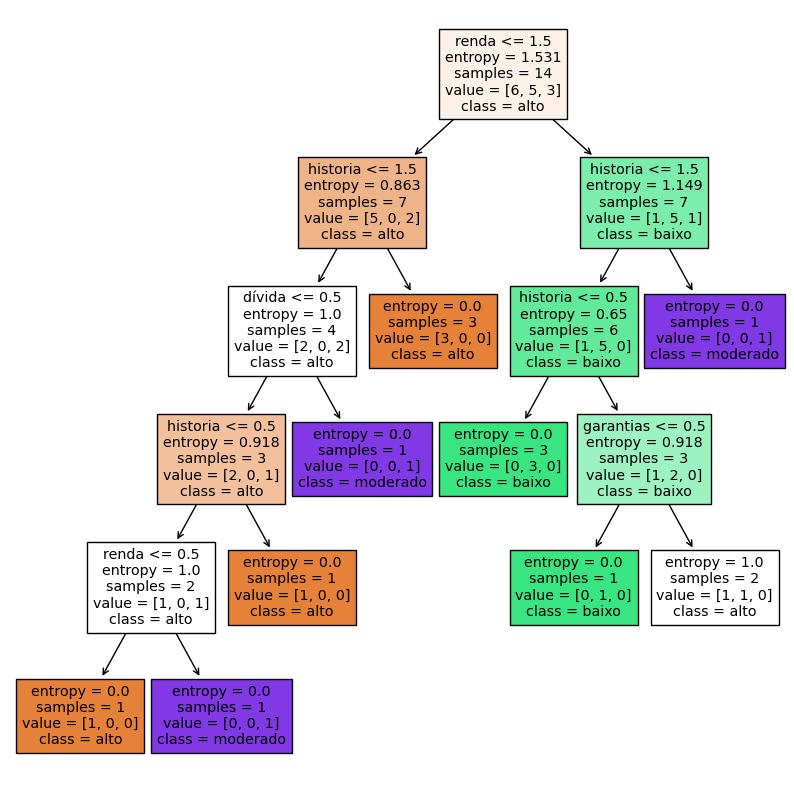

In [15]:
previsores =['historia','dívida','garantias','renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled=True);

In [16]:
previsoes = arvore_risco_credito.predict([[0,0,1,2]])

In [17]:
previsoes

array(['baixo'], dtype=object)

In [18]:
df.columns

Index(['historia', 'divida', 'garantias', 'renda', 'risco'], dtype='object')